<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Optimización univariada usando JAX </center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Campo Turriago, cepardot@unal.edu.co
5. Oleg Jarma, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Carga módulos](#Carga-módulos)
* [Genera y gráfica datos simulados](#Genera-y-gráfica-datos-simulados)
* [Función de pérdida](#Función-de-Pérdida)
* [Gradiente descendiente](#Gradiente-descendiente)
* [Optimización](#Optimización)
* [Visualizando la función pérdida](#Visualizando-función-pérdida)


## <span style="color:blue">Introducción</span> 

En este ejercicio generamos un conjunto de datos que sigue un modelo lineal, pasando por el origen. Lo datos son contaminados con un error normal $N(0,1)$.

## <span style="color:blue">Carga módulos</span> 

In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
import pandas as pd
from jax import grad, jit

Nótese el paquete `jax.numpy`. Los miembros de jax hicieron su propia versión de numpy con mejor compatibilidad y una mayor optimización, a costa de otras cosas. Si se trabaja jax, es recomendable usar las funciones de jax.numpy si es posible. Estas se encuentran [aquí](https://jax.readthedocs.io/en/latest/jax.numpy.html)

## <span style="color:blue">Genera y gráfica datos simulados</span> 

In [2]:
# Simulación de datos

# Se elige una 
np.random.seed(22)

# Generate Data
x=jnp.linspace(-2,2,100)
y=5*x+2*np.random.normal(0,1,len(x))

data=pd.DataFrame({"Mediciones":x,"Observaciones":y})
data.head()

,Mediciones,Observaciones
0,-2.000000,-10.183900
1,-1.959596,-12.724681
2,-1.919192,-7.432375
3,-1.878788,-9.872590
4,-1.838384,-10.174177


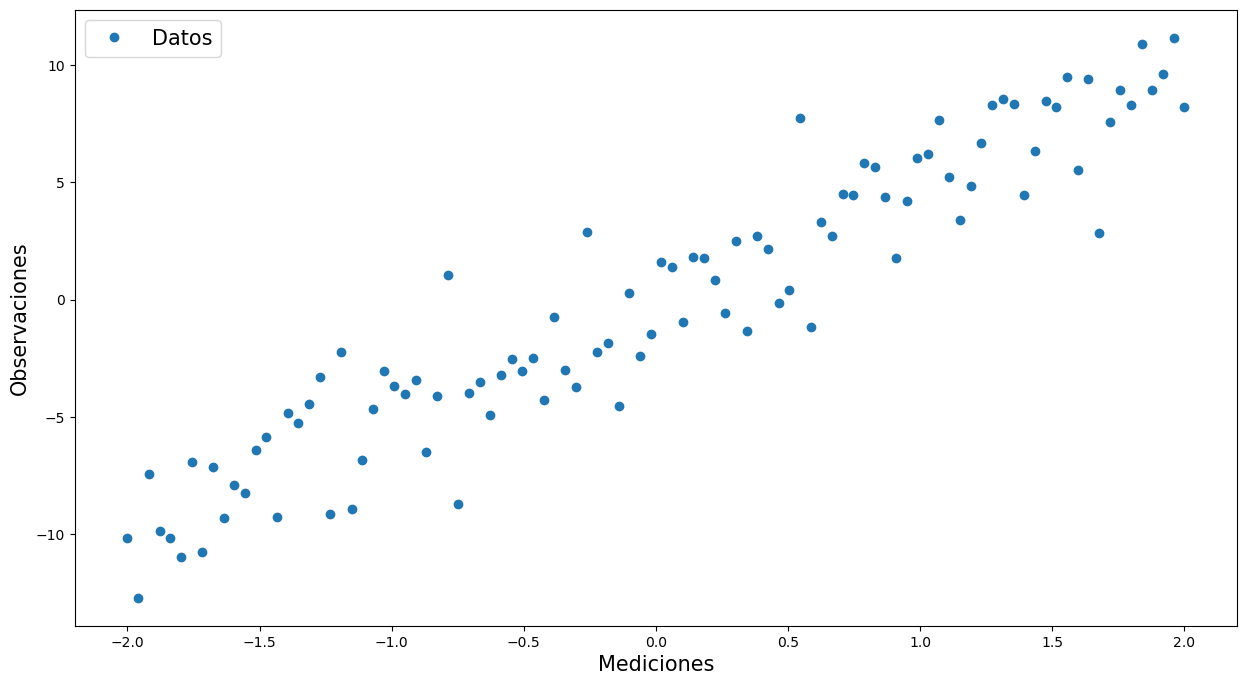

In [3]:
plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos"],fontsize=15)
plt.show()

## <span style="color:blue">Genera y grafica datos simulados con Widgets</span> 

In [4]:
from ipywidgets import interactive

In [5]:
# Simulación de datos

def simular_datos(σ=0,w1=0):
    # Elije una semilla
    np.random.seed(22)

    # Generamos datos
    x=jnp.linspace(-2,2,100)
    y=w1*x+np.random.normal(loc=0,scale=σ,size=len(x))
    data=pd.DataFrame({"Mediciones":x,"Observaciones":y})

    plt.figure(figsize=(10,7))
    plt.plot(x,y,'o',markersize=5)
    plt.xlabel("Mediciones",fontsize=15)
    plt.ylabel("Observaciones",fontsize=15)
    plt.legend(["Datos"],fontsize=15)
    plt.ylim([-30,30])
    plt.title(f'Simulación de ${w1}x+\epsilon$, $\epsilon$ ~ N(0,σ²)')
    plt.show()
    return x,y

interactive_plot = interactive(simular_datos, σ=(0, 10.,0.2),w1 = (-10.,10.))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='σ', max=10.0, step=0.2), FloatSlider(value=0.0, desc…

## <span style="color:blue">Ejercicio</span>  

Juegue con los sliders para entender a profundidad lo que hace cada parámetro

## <span style="color:blue">Función de pérdida</span>  

In [6]:
## Diferenciación Automática
def loss(w1,x,y):
    return jnp.mean((y-(w1*x))**2)

#sin usar jit

%timeit grad(loss,argnums=(0))

11.8 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
#usando jit
%timeit jit(grad(loss,argnums=(0)))

grad_loss = jit(grad(loss,argnums=(0)))

46.8 µs ± 7.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## <span style="color:blue">Gradiente descendiente </span>  

$$\textbf{futuro = presente + paso*cambio}$$

$$w_{1}^{n+1}=w_{1}^{n}-hL'\big|_{w_{1}^{n}}$$

In [8]:
def optimize(w1,x,y,h=1.5):
    
    # Calcular Derivada
    w1_grad=grad_loss(w1,x,y)
    
    # Gradiente Descendiente
    w1-=h*w1_grad
    
    # Regresar Nuevos parámetros
    return w1

## <span style="color:blue">Optimización</span>  

In [9]:
## Initial Guess
W1=10.

# Acumular resultados
w1=[]
train_loss=[]
# Número de veces que se cambiar los parámetros
epochs=401

# Tasa de Aprendizaje
h=0.01
#0.8

print("Pérdidas:\n")

w1.append(W1)
train_loss.append(loss(W1,x,y))
print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

for epoch in range(epochs):
    
    W1=optimize(W1,x,y,h)
    
    w1.append(W1)
    
    losss=loss(W1,x,y)
    
    train_loss.append(losss)
    
    if epoch%100==0:
        print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")

Pérdidas:

Condición Inicial: Pérdida: 38.40774154663086, Parámetro: 10.0

Iteración 0: Pérdida: 36.55500793457031, Parámetro: 9.86294937133789
Iteración 100: Pérdida: 4.018570899963379, Parámetro: 5.273087501525879
Iteración 200: Pérdida: 3.887772798538208, Parámetro: 4.982072830200195
Iteración 300: Pérdida: 3.887246608734131, Parámetro: 4.963622093200684
Iteración 400: Pérdida: 3.887244701385498, Parámetro: 4.962450981140137


In [10]:
print(w1[-1])

4.962451


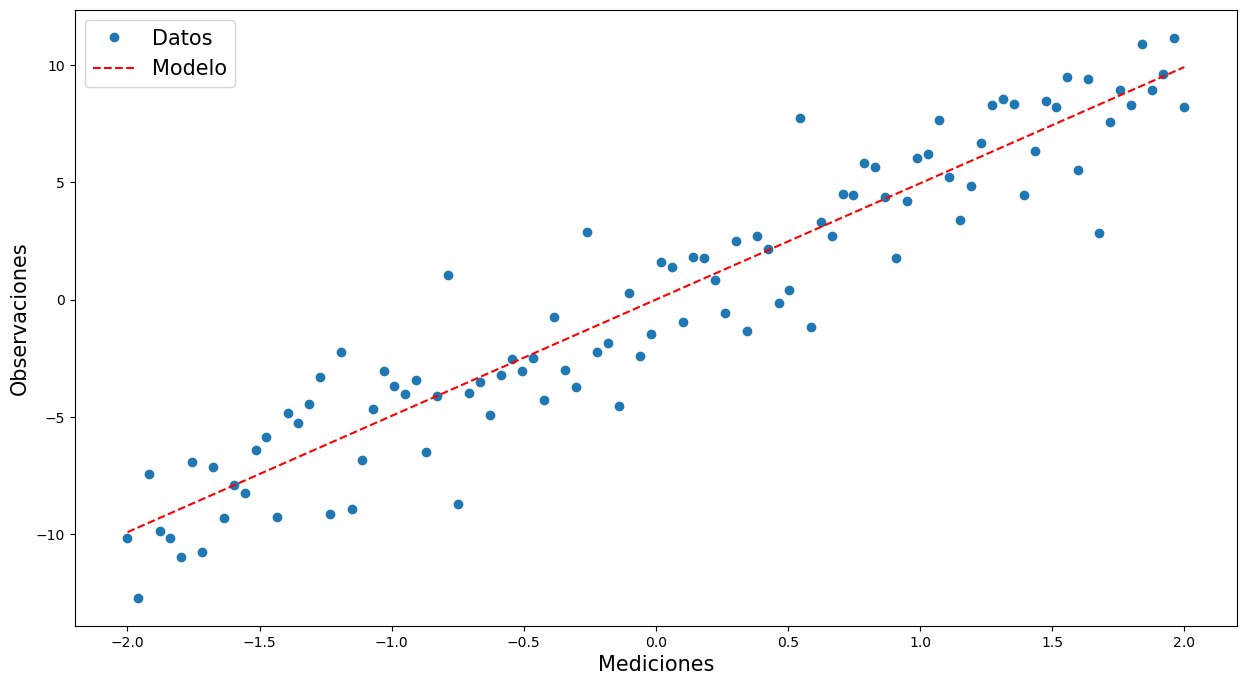

In [11]:
# Make Model

mod=w1[-1]*x

# Draw Model

plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.plot(x,mod,'r--')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos","Modelo"],fontsize=15)
plt.show()

## <span style="color:blue">Usando Widgets</span>  

In [12]:
def regresion(μ=0,σ=0,m=0,epochs=0,W1=0,aprendizaje=0.1):
    # Choose a Seed
    np.random.seed(22)

    # Generate Data
    x=jnp.linspace(-2,2,100)
    y=m*x+2*np.random.normal(loc=μ,scale=σ,size=len(x))

    data=pd.DataFrame({"Mediciones":x,"Observaciones":y})

    ## Initial Guess
    W1=W1

    # Acumular resultados
    w1=[]
    train_loss=[]
    # Número de veces que se cambiar los parámetros
    epochs=epochs

    # Tasa de Aprendizaje
    h=aprendizaje
    #0.8

    print("Pérdidas:\n")

    w1.append(W1)
    train_loss.append(loss(W1,x,y))
    print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

    for epoch in range(epochs):

        W1=optimize(W1,x,y,h)

        w1.append(W1)

        losss=loss(W1,x,y)

        train_loss.append(losss)

        if epoch%100==0:
            print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")
        
        # Make Model

    mod=w1[-1]*x

    plt.figure(figsize=(15,8))
    plt.plot(x,y,'o')
    plt.plot(x,mod,'r--')
    plt.xlabel("Mediciones",fontsize=15)
    plt.ylabel("Observaciones",fontsize=15)
    plt.legend(["Datos","Modelo"],fontsize=15)
    plt.show()
    

interactive_plot = interactive(regresion, σ=(0, 10.), μ=(-3, 3, 0.5),m = (-10.,10.),epochs=(0,500),W1=(-10.,10.),aprendizaje=(0.0001,1.))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='μ', max=3.0, min=-3.0, step=0.5), FloatSlider(value=…

## <span style="color:blue">Visualizando la función pérdida </span>  

In [13]:
# eje β (par.)
β1x=jnp.linspace(-2,11,epochs)

l=jnp.empty(len(β1x))

for i in range(len(l)):
    l.at[i].set(jnp.mean((β1x[i]*x-y)**2))
    #l[i]=((β1x[i]*x-y)**2).mean()

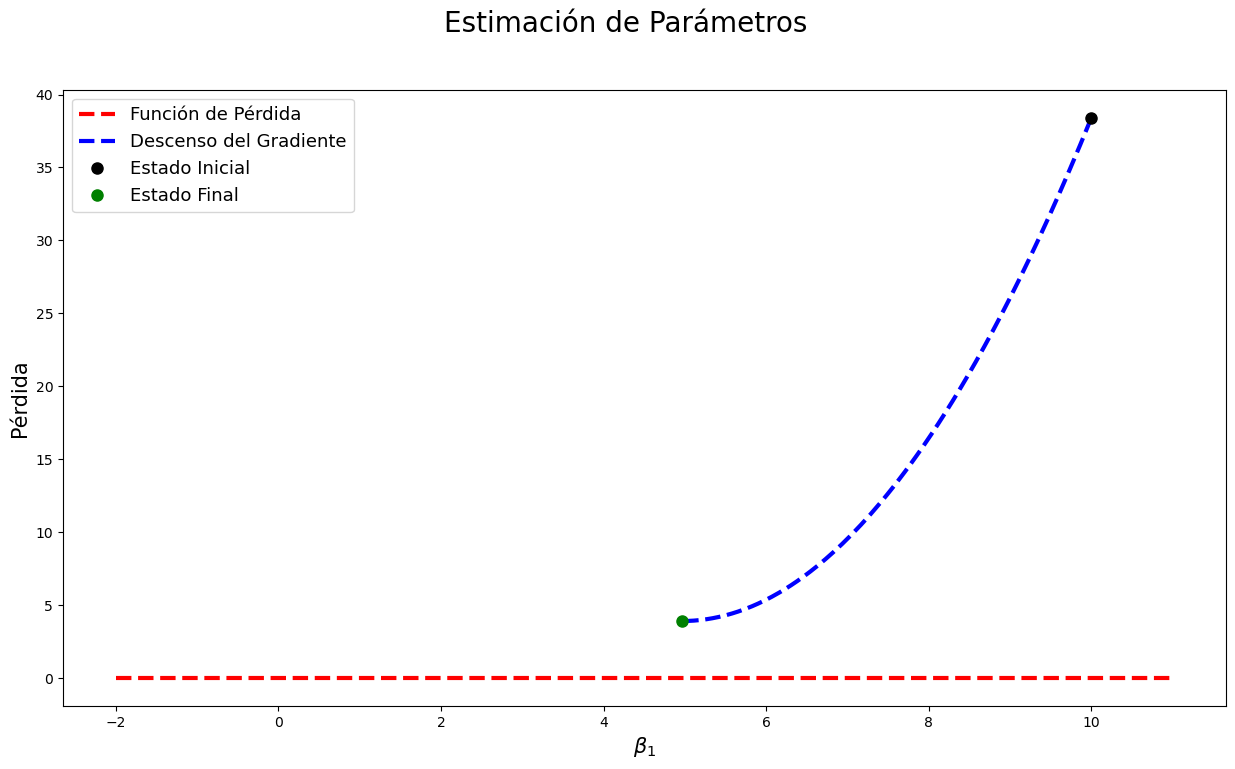

In [14]:
fig = plt.figure(figsize=(15,8))
plt.suptitle("Estimación de Parámetros",fontsize=20)
ax = plt.axes()


ax.plot(β1x,l,'r--',lw=3) # Loss Function

ax.plot(w1,train_loss,'b--',lw=3,ms=8) # Path Taken by Optimizer
ax.plot(w1[0],train_loss[0],'ko',ms=8) # Initial Condition
ax.plot(w1[-1],train_loss[-1],'go',ms=8) # Final State

ax.set_xlabel(r"$\beta_1$",fontsize=15)
ax.set_ylabel(r"Pérdida",fontsize=15)
plt.legend(["Función de Pérdida","Descenso del Gradiente","Estado Inicial","Estado Final"],fontsize=13)
plt.show()

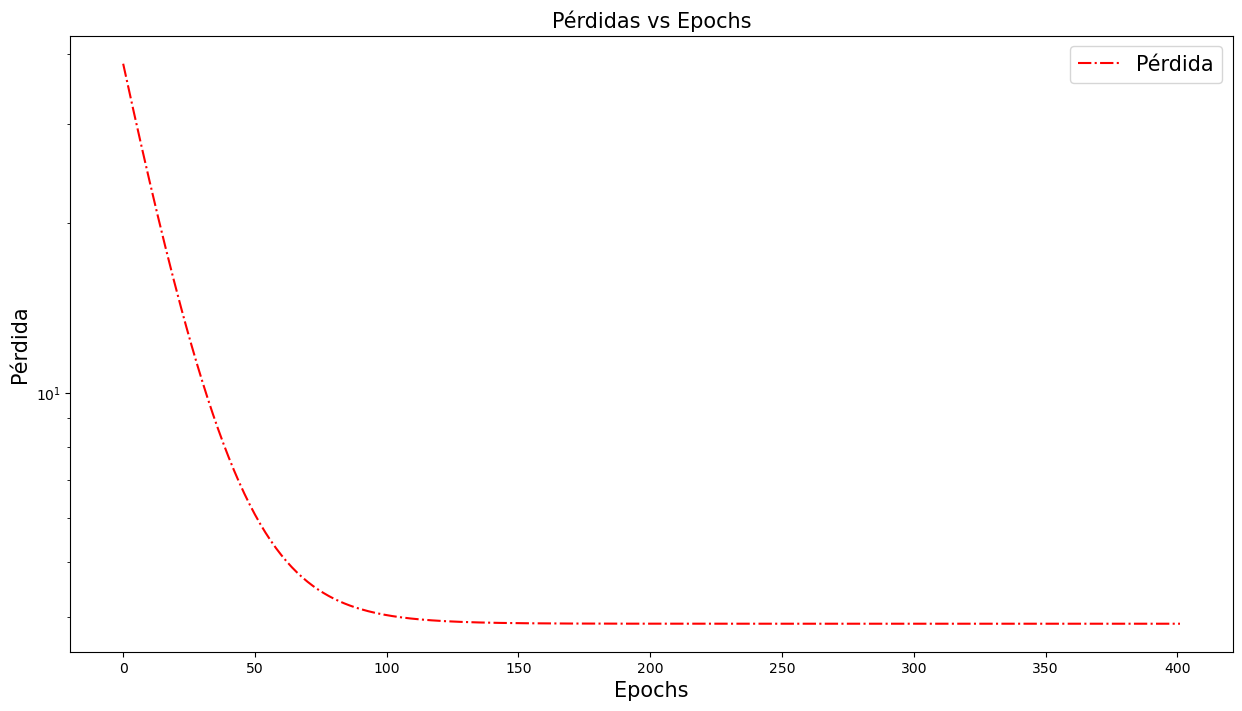

In [15]:
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs+1),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.title("Pérdidas vs Epochs",fontsize=15)
plt.show()

## <span style="color:blue">Aplicando Todo</span>  

In [16]:
def regresion(μ,σ,m,epochs,W1,aprendizaje):
    # Choose a Seed
    np.random.seed(22)

    # Generate Data
    x=jnp.linspace(-2,2,100)
    y=m*x+2*np.random.normal(loc=μ,scale=σ,size=len(x))

    data=pd.DataFrame({"Mediciones":x,"Observaciones":y})

    ## Initial Guess
    W1=W1

    # Acumular resultados
    w1=[]
    train_loss=[]
    # Número de veces que se cambiar los parámetros
    epochs=epochs

    # Tasa de Aprendizaje
    h=aprendizaje
    #0.8

    #print("Pérdidas:\n")

    w1.append(W1)
    train_loss.append(loss(W1,x,y))
    #print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

    
    for epoch in range(epochs):

        W1=optimize(W1,x,y,h)

        w1.append(W1)

        losss=loss(W1,x,y)

        train_loss.append(losss)

        #if epoch%100==0:
            #print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")
        
        # Make Model

    mod=w1[-1]*x
    
        # eje β (par.)
    β1x=jnp.linspace(-11,16,epochs)

    l=jnp.empty(len(β1x))

    for i in range(len(l)):
        l.at[i].set(jnp.mean((β1x[i]*x-y)**2))
        #l[i]=((β1x[i]*x-y)**2).mean()

    plt.figure(figsize=(22,7))
    
    plt.subplot(121)
    plt.plot(x,y,'o')
    plt.plot(x,mod,'r--')
    plt.xlabel("Mediciones",fontsize=15)
    plt.ylabel("Observaciones",fontsize=15)
    plt.legend(["Datos","Modelo"],fontsize=15)
    
    plt.subplot(122)
    plt.suptitle("Estimación de Parámetros",fontsize=20)
    #ax = plt.axes()


    plt.plot(β1x,l,'r--',lw=3) # Loss Function

    plt.plot(w1,train_loss,'b--',lw=3,ms=8) # Path Taken by Optimizer
    plt.plot(w1[0],train_loss[0],'ko',ms=8) # Initial Condition
    plt.plot(w1[-1],train_loss[-1],'go',ms=8) # Final State

    plt.xlabel(r"$w_1$",fontsize=15)
    plt.ylabel(r"Pérdida",fontsize=15)
    plt.legend(["Función de Pérdida","Descenso del Gradiente","Estado Inicial","Estado Final"],fontsize=13)
    plt.show()
    

interactive_plot = interactive(regresion, σ=(0, 10.), μ=(-3, 3, 0.5),m = (-10.,10.),epochs=(0,500),W1=(-10.,10.),aprendizaje=(0.0001,1.,0.01))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='μ', max=3.0, min=-3.0, step=0.5), FloatSlider(value=…

## <span style="color:blue">Ejercicios</span>  

- Hacer un aplicativo que muestre las animaciones de manera fluida.
- Probar otro tipo de simulación de datos que no tengan tendencia lineal.
- ¿Cuáles son los hiperparámetros apropiados para obtener el mejor modelo en menos epochs?

In [17]:
# Sus respuestas aquí